In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [15]:
df = pd.read_csv('/Users/connormcdonald/Desktop/Masters/MIT807/Data/y18a.csv')
df['text'] = df['Abstract']

In [16]:
df.head()

,Title,Year,Link,Abstract,text
0,Generating tree-level harvest predictions from...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Wood supply predictions from forest inventorie...,Wood supply predictions from forest inventorie...
1,Deep learning for DNase i hypersensitive sites...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: The DNase I hypersensitive sites (...,Background: The DNase I hypersensitive sites (...
2,PDRLGB: Precise DNA-binding residue prediction...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: Identifying specific residues for ...,Background: Identifying specific residues for ...
3,Computational drug repositioning using meta-pa...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: Drug repositioning is a promising ...,Background: Drug repositioning is a promising ...
4,A context-free encoding scheme of protein sequ...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: The evolution of influenza A virus...,Background: The evolution of influenza A virus...


In [17]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['text'].apply(subjectivity)
df['polarity'] = df['text'].apply(polarity)

df

,Title,Year,Link,Abstract,text,subjectivity,polarity
0,Generating tree-level harvest predictions from...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Wood supply predictions from forest inventorie...,Wood supply predictions from forest inventorie...,0.507428,0.178804
1,Deep learning for DNase i hypersensitive sites...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: The DNase I hypersensitive sites (...,Background: The DNase I hypersensitive sites (...,0.319048,0.085714
2,PDRLGB: Precise DNA-binding residue prediction...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: Identifying specific residues for ...,Background: Identifying specific residues for ...,0.360069,0.057639
3,Computational drug repositioning using meta-pa...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: Drug repositioning is a promising ...,Background: Drug repositioning is a promising ...,0.486087,0.179040
4,A context-free encoding scheme of protein sequ...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: The evolution of influenza A virus...,Background: The evolution of influenza A virus...,0.660000,0.130909
...,...,...,...,...,...,...,...
1995,Biomedical literature classification with a cn...,2018,https://www.scopus.com/inward/record.uri?eid=2...,"Deep learning techniques, e.g., Convolutional ...","Deep learning techniques, e.g., Convolutional ...",0.426190,0.140807
1996,A clinical and proteomics approach to predict ...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Background: Peripheral arterial disease (PAD) ...,Background: Peripheral arterial disease (PAD) ...,0.454009,0.155431
1997,Multiqubit and multilevel quantum reinforcemen...,2018,https://www.scopus.com/inward/record.uri?eid=2...,We propose a protocol to perform quantum reinf...,We propose a protocol to perform quantum reinf...,0.625000,0.131250
1998,Predicting acute kidney injury in cancer patie...,2018,https://www.scopus.com/inward/record.uri?eid=2...,How can we predict the occurrence of acute kid...,How can we predict the occurrence of acute kid...,0.513418,0.175210


(-0.5, 499.5, 299.5, -0.5)

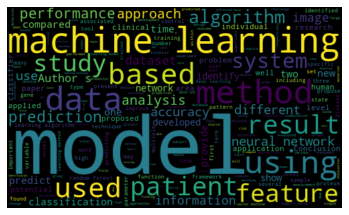

In [18]:
allwords = ' '.join([tweets for tweets in df['text']]) 
wordCloud = WordCloud(width =500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')

In [19]:
def sentiment(score):
    if score < 0:
        return 'negative'
    if score == 0:
        return 'neutral'
    if score > 0:
        return 'positive'
    
df['sentiment'] = df['polarity'].apply(sentiment)

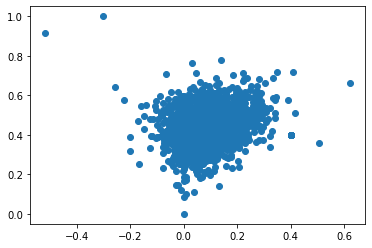

In [20]:
plt.scatter(df['polarity'], df['subjectivity'])

In [24]:
dfs = df.sort_values(by=['polarity'], ascending = True)
dfs.tail()

,Title,Year,Link,Abstract,text,subjectivity,polarity,sentiment
1570,Considerations for the development and impleme...,2018,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],[No abstract available],0.400000,0.400000,positive
663,Response to Comment on “Predicting reaction pe...,2018,https://www.scopus.com/inward/record.uri?eid=2...,We demonstrate that the chemical-feature model...,We demonstrate that the chemical-feature model...,0.718750,0.406250,positive
913,Youtube spam comment detection using support v...,2018,https://www.scopus.com/inward/record.uri?eid=2...,"Social networking such as YouTube, Facebook an...","Social networking such as YouTube, Facebook an...",0.509524,0.416190,positive
661,Prediction of prehypertenison and hypertension...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Hypertension and prehypertension are risk fact...,Hypertension and prehypertension are risk fact...,0.361111,0.505556,positive
848,Developing and maintaining clinical decision s...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Development and maintenance of order sets is a...,Development and maintenance of order sets is a...,0.660000,0.620000,positive


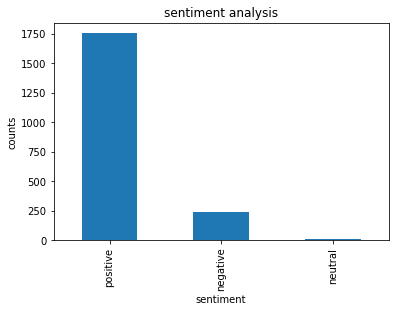

In [22]:
df['sentiment'].value_counts()
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['sentiment'].value_counts().plot(kind='bar')
plt.show()